In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset as dataframe
df = pd.read_csv('creditcard.csv')
df = df[ ["Time","Amount","Class"] ]

In [3]:
# Viewing the dataset
df

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [4]:
# Sorting duplicate rows
df_no_duplicates=df.drop_duplicates()
print(df_no_duplicates)

            Time  Amount  Class
0            0.0  149.62      0
1            0.0    2.69      0
2            1.0  378.66      0
3            1.0  123.50      0
4            2.0   69.99      0
...          ...     ...    ...
284802  172786.0    0.77      0
284803  172787.0   24.79      0
284804  172788.0   67.88      0
284805  172788.0   10.00      0
284806  172792.0  217.00      0

[279950 rows x 3 columns]


In [5]:
# Exploring the data
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [6]:
# Missing values
df.isnull().sum()

Time      0
Amount    0
Class     0
dtype: int64

In [7]:
# Separate identity and target (Data-Preprocessing)
X = df.drop('Class', axis=1)
y = df['Class']

In [8]:
X

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:
# Split data into training and testing partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create and train the logistic regression model
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
X_test

,Time,Amount
43428,41505.0,364.19
49906,44261.0,520.12
29474,35484.0,31.00
276481,167123.0,1.50
278846,168473.0,0.89
...,...,...
75723,56223.0,75.69
252263,155726.0,9.99
221246,142491.0,7.63
81910,59157.0,3.59


In [13]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [14]:
# count predicted frauds & actual frauds
actual_count = len(y_test[y_test == 0])
pred_count = len(y_pred[y_pred == 0])

In [15]:
# Display number of actual frauds and no. of predicted frauds.
print("Actual fraud: ", actual_count)
print("Predicted fraud: ", pred_count)
print(len(y_pred))

Actual fraud:  56864
Predicted fraud:  56962
56962


In [16]:
Legit_transactions = len(y [y == 1])
print("Legit Transactions:", Legit_transactions)

Legit Transactions: 492


In [17]:
# Calculate & display model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9982795547909132


In [18]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


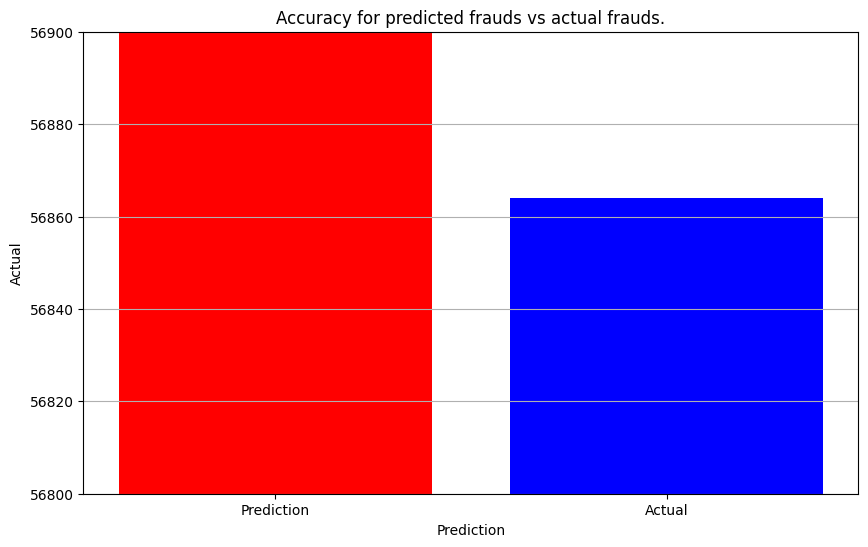

In [19]:
# Plot Graph
plt.figure(figsize=(10, 6))
plt.bar(['Prediction', 'Actual'], [pred_count, actual_count], color = ['red', 'blue'])
plt.title('Accuracy for predicted frauds vs actual frauds.')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.ylim(56800, 56900)
plt.grid(axis='y')
plt.show()

In [20]:
# Creating the confusion matirx
cm = confusion_matrix(y_test, y_pred)
cm

array([[56864,     0],
       [   98,     0]])

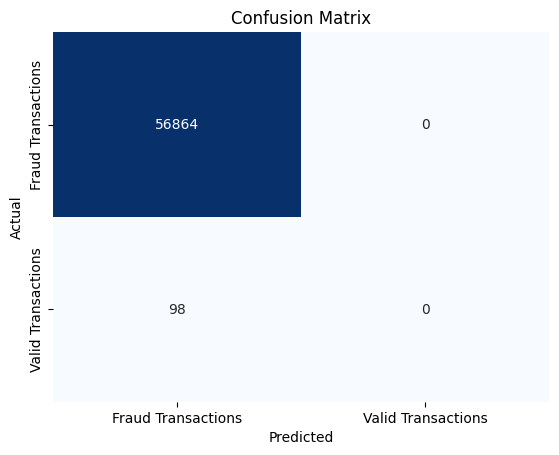

In [21]:
# Plotting the confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels=["Fraud Transactions", "Valid Transactions"])
plt.yticks(ticks=[0.5, 1.5], labels=["Fraud Transactions", "Valid Transactions"])
plt.show()

In [22]:
new_data = pd.read_csv("new_data.csv")
new_data

,Time,Amount
0,155359,0.77


In [23]:
new_pred = model.predict(new_data)
print(new_pred)

[0]


In [24]:
if(new_pred == 0):
    print("This is a fraud transaction.")
else:
    print("This is a valid transaction.")

This is a fraud transaction.
